# Player evaluation

Here we compare players based on their adjusted points. Also, we calculate some useful metrics using the adjusted points to further evaluate player performance in FPL.

In [1]:
# recent gameweek
gameweek = 4

In [2]:
# import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

pd.set_option('max_columns',100)

In [3]:
# fetch FPL data
filepath = '../data/fpl/data_week' + str(gameweek) + '.csv'
df = pd.read_csv(filepath, index_col=0)

# fetch team data
filepath = '../data/fbref/team_stats_week' + str(gameweek) + '.csv'
teamStats = pd.read_csv(filepath, index_col=0)

# fetch player stats data
filepath = '../data/fbref/player_stats_week' + str(gameweek) + '.csv'
playerStats = pd.read_csv(filepath, index_col=0, skiprows=1)

## Value and value points

Here we calculate two interesting metrics: 'value' and 'value points'. 

Value is simply adjusted points per game divided by the cost of the player. Essentially, this measures how many 'points per pound(/euro/whatever)' has the player gained on an average game week. 

The value points is calculated as the geometric mean of a players adjusted points per game and value. Essentially, in FPL we want to gain the maximum possible amount of points. However, we are restrained by a limited budget, so that in practice we cannot just pick all the best players. Then, we would like to have a squad of players that give the most points given our budget. Thus, we would like to pick players that have high value ('bang for buck'). However, often the players with highest value are very cheap players who somewhat overperform relative to their price. Picking a squad full of these players might leave a part of our budget unused. Calculating the geometric mean of adjusted points and value allows us to weigh both aspects equally, i.e. we want players that both gain a lot of points but also have good value. For example, this metric values equally two players, where one has twice the points per game of the other who in turn has twice the value of the other.

In [4]:
# value = expected points / cost
df['value'] = df['adjusted points per game'] / (df['now_cost'] / 10.0)
# geometric mean of 'adjusted points per game' and 'value'
df['valuePoints metric'] = np.sqrt(df['adjusted points per game'] * df['value'])

In [5]:
goalkeepers = df['element_type'] == 1
defenders = df['element_type'] == 2
midfielders = df['element_type'] == 3
forwards = df['element_type'] == 4

#minGames = df['games played'] >= 0

## Player evaluation

Below we compile lists for each position sorting players based on a given metric.

Notice that 'next1_xP' is currently based on preseason expectations on average player performance!

In [6]:
metric = 'valuePoints metric'
#metric = 'adjusted points per game'
#metric = 'next1_xP'

numberToShow = 40

print('GOALKEEPERS')
display(df[goalkeepers ].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game','next1_xP',\
                                                  'valuePoints metric']].head(numberToShow))
print('DEFENDERS')
display(df[defenders ].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game','next1_xP',\
                                                  'valuePoints metric']].head(numberToShow))
print('MIDFIELDERS')
display(df[midfielders ].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game','next1_xP',\
                                                  'valuePoints metric']].head(numberToShow))
print('FORWARDS')
display(df[forwards ].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game','next1_xP',\
                                                  'valuePoints metric']].head(numberToShow))

GOALKEEPERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,next1_xP,valuePoints metric
id,,,,,,,,,,
12,Martínez,Aston Villa,47,3.013699,22,18.012693,7.3,5.976939,5.564977,2.756956
325,Darlow,Newcastle Utd,50,3.958333,19,18.904452,4.8,4.775862,5.240149,2.135830
252,Alisson,Liverpool,60,2.982456,17,15.234554,5.7,5.108056,4.575185,2.085355
363,McCarthy,Southampton,45,4.047619,17,15.261521,4.2,3.770494,3.284163,1.777428
157,Pickford,Everton,50,4.000000,12,15.749193,3.0,3.937298,3.040079,1.760813
483,Ramsdale,Sheffield Utd,50,4.090909,9,15.171215,2.2,3.708519,4.465142,1.658500
128,Guaita,Crystal Palace,50,3.947368,15,14.109132,3.8,3.574313,3.397126,1.598482
8,Leno,Arsenal,50,4.000000,14,14.252847,3.5,3.563212,3.328736,1.593517
213,Meslier,Leeds United,45,3.947368,15,13.332656,3.8,3.377606,3.847153,1.592219


DEFENDERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,next1_xP,valuePoints metric
id,,,,,,,,,,
389,Aurier,Tottenham,52,1.000000,12,9.175857,12.0,9.175857,8.227727,4.023880
232,Chilwell,Chelsea,56,1.000000,18,9.018550,18.0,9.018550,9.119805,3.811033
470,Kilman,Wolves,40,1.000000,9,7.075031,9.0,7.075031,7.315689,3.537515
442,Masuaku,West Ham,45,3.015873,19,17.066274,6.3,5.658817,4.614634,2.667592
435,Cresswell,West Ham,49,4.000000,24,21.689509,6.0,5.422377,4.423324,2.449580
155,Digne,Everton,61,4.000000,20,22.950846,5.0,5.737711,5.054567,2.323131
123,James,Chelsea,51,3.018868,16,14.475087,5.3,4.794873,5.035710,2.123205
498,Castagne,Leicester City,57,4.000000,28,20.002603,7.0,5.000651,4.373012,2.094542
41,Mings,Aston Villa,51,2.987013,23,14.077987,7.7,4.713065,4.173520,2.086980


MIDFIELDERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,next1_xP,valuePoints metric
id,,,,,,,,,,
105,Jorginho,Chelsea,51,3.000000,27,24.719119,9.0,8.239706,7.239015,3.648603
37,Grealish,Aston Villa,71,2.991453,35,25.398248,11.7,8.490271,7.858828,3.186342
33,Hourihane,Aston Villa,60,2.000000,17,13.466569,8.5,6.733284,6.319772,2.748852
508,Rodríguez,Everton,78,3.977273,35,29.427944,8.8,7.399026,8.224299,2.649276
251,Mané,Liverpool,119,3.012048,25,26.064181,8.3,8.653308,5.826563,2.508469
390,Son,Tottenham,90,4.017857,45,29.681103,11.2,7.387297,6.491511,2.462432
254,Salah,Liverpool,122,4.019608,41,33.193732,10.2,8.257953,5.795665,2.364245
38,McGinn,Aston Villa,55,3.013699,22,16.005652,7.3,5.310967,4.983168,2.264604
69,Trossard,Brighton,60,4.000000,20,21.200263,5.0,5.300066,5.820714,2.163743


FORWARDS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,next1_xP,valuePoints metric
id,,,,,,,,,,
388,Kane,Tottenham,106,4.000000,44,43.824959,11.0,10.956240,9.722037,3.365182
514,Watkins,Aston Villa,59,2.987013,23,21.900826,7.7,7.332016,6.741348,3.018543
506,Wilson,Newcastle Utd,64,4.000000,34,30.440826,8.5,7.610207,11.492491,3.008198
68,Maupay,Brighton,66,4.000000,32,27.340826,8.0,6.835207,7.285827,2.660601
164,Calvert-Lewin,Everton,76,4.021739,37,28.100000,9.2,6.987027,8.326634,2.534461
166,Richarlison,Everton,80,3.965517,23,25.922479,5.8,6.536973,7.591462,2.311169
202,Bamford,Leeds United,58,4.000000,30,21.701653,7.5,5.425413,5.412097,2.252780
224,Vardy,Leicester City,101,4.000000,34,26.380000,8.5,6.595000,6.257729,2.075172
6,Lacazette,Arsenal,85,3.000000,21,16.800000,7.0,5.600000,6.159646,1.920784


Below we compile a list sorting players based on a given metric (irrespective of position).

In [7]:
metric = 'adjusted points per game'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game','next1_xP',\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,next1_xP,valuePoints metric
id,,,,,,,,,,
388,Kane,Tottenham,106,4.000000,44,43.824959,11.0,10.956240,9.722037,3.365182
389,Aurier,Tottenham,52,1.000000,12,9.175857,12.0,9.175857,8.227727,4.023880
232,Chilwell,Chelsea,56,1.000000,18,9.018550,18.0,9.018550,9.119805,3.811033
251,Mané,Liverpool,119,3.012048,25,26.064181,8.3,8.653308,5.826563,2.508469
37,Grealish,Aston Villa,71,2.991453,35,25.398248,11.7,8.490271,7.858828,3.186342
254,Salah,Liverpool,122,4.019608,41,33.193732,10.2,8.257953,5.795665,2.364245
105,Jorginho,Chelsea,51,3.000000,27,24.719119,9.0,8.239706,7.239015,3.648603
506,Wilson,Newcastle Utd,64,4.000000,34,30.440826,8.5,7.610207,11.492491,3.008198
508,Rodríguez,Everton,78,3.977273,35,29.427944,8.8,7.399026,8.224299,2.649276


In [8]:
metric = 'valuePoints metric'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game','next1_xP',\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,next1_xP,valuePoints metric
id,,,,,,,,,,
389,Aurier,Tottenham,52,1.000000,12,9.175857,12.0,9.175857,8.227727,4.023880
232,Chilwell,Chelsea,56,1.000000,18,9.018550,18.0,9.018550,9.119805,3.811033
105,Jorginho,Chelsea,51,3.000000,27,24.719119,9.0,8.239706,7.239015,3.648603
470,Kilman,Wolves,40,1.000000,9,7.075031,9.0,7.075031,7.315689,3.537515
388,Kane,Tottenham,106,4.000000,44,43.824959,11.0,10.956240,9.722037,3.365182
37,Grealish,Aston Villa,71,2.991453,35,25.398248,11.7,8.490271,7.858828,3.186342
514,Watkins,Aston Villa,59,2.987013,23,21.900826,7.7,7.332016,6.741348,3.018543
506,Wilson,Newcastle Utd,64,4.000000,34,30.440826,8.5,7.610207,11.492491,3.008198
12,Martínez,Aston Villa,47,3.013699,22,18.012693,7.3,5.976939,5.564977,2.756956


In [9]:
metric = 'next1_xP'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game','next1_xP',\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,next1_xP,valuePoints metric
id,,,,,,,,,,
506,Wilson,Newcastle Utd,64,4.000000,34,30.440826,8.5,7.610207,11.492491,3.008198
388,Kane,Tottenham,106,4.000000,44,43.824959,11.0,10.956240,9.722037,3.365182
232,Chilwell,Chelsea,56,1.000000,18,9.018550,18.0,9.018550,9.119805,3.811033
164,Calvert-Lewin,Everton,76,4.021739,37,28.100000,9.2,6.987027,8.326634,2.534461
389,Aurier,Tottenham,52,1.000000,12,9.175857,12.0,9.175857,8.227727,4.023880
508,Rodríguez,Everton,78,3.977273,35,29.427944,8.8,7.399026,8.224299,2.649276
37,Grealish,Aston Villa,71,2.991453,35,25.398248,11.7,8.490271,7.858828,3.186342
166,Richarlison,Everton,80,3.965517,23,25.922479,5.8,6.536973,7.591462,2.311169
272,De Bruyne,Manchester City,116,2.982456,17,20.947810,5.7,7.023677,7.332995,2.062223


In [10]:
metric = 'valuePoints metric'

display(df[defenders & (df['now_cost']<47)].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game','next1_xP',\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,next1_xP,valuePoints metric
id,,,,,,,,,,
470,Kilman,Wolves,40,1.000000,9,7.075031,9.0,7.075031,7.315689,3.537515
442,Masuaku,West Ham,45,3.015873,19,17.066274,6.3,5.658817,4.614634,2.667592
443,Balbuena,West Ham,44,2.000000,12,8.293928,6.0,4.146964,3.158497,1.976988
46,Konsa,Aston Villa,46,3.013699,22,12.612693,7.3,4.185121,3.745058,1.951323
352,Jack Robinson,Sheffield Utd,44,2.000000,3,7.670372,1.5,3.835186,4.819794,1.828353
486,Dann,Crystal Palace,45,1.000000,7,3.787647,7.0,3.787647,3.610460,1.785514
376,Bednarek,Southampton,45,3.947368,15,14.906437,3.8,3.776297,3.241589,1.780164
369,Vestergaard,Southampton,45,2.978723,14,11.207978,4.7,3.762678,3.254978,1.773744
484,Robinson,Fulham,44,1.000000,2,3.428030,2.0,3.428030,3.827400,1.634249


## Player Visualizations

In [11]:
game_weeks = np.arange(1,gameweek+1)
column_xPoints = []
for i in range(1,gameweek+1):
    column_xPoints.append('xPoints week ' + str(i))

display(game_weeks)
display(column_xPoints)

array([1, 2, 3, 4])

['xPoints week 1', 'xPoints week 2', 'xPoints week 3', 'xPoints week 4']

,assists,bonus,bps,chance_of_playing_next_round,chance_of_playing_this_round,clean_sheets,code,corners_and_indirect_freekicks_order,corners_and_indirect_freekicks_text,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,creativity,creativity_rank,creativity_rank_type,direct_freekicks_order,direct_freekicks_text,dreamteam_count,element_type,ep_next,ep_this,event_points,first_name,form,goals_conceded,goals_scored,ict_index,ict_index_rank,ict_index_rank_type,in_dreamteam,influence,influence_rank,influence_rank_type,minutes,news,news_added,now_cost,own_goals,penalties_missed,penalties_order,penalties_saved,penalties_text,photo,points_per_game,red_cards,saves,second_name,selected_by_percent,special,...,transfers_in,transfers_in_event,transfers_out,transfers_out_event,value_form,value_season,web_name,yellow_cards,team_name,games played,adjusted points,xG,xG_points,xG_week4,goals_week4,xPoints week 4,clean_sheet_points,xGA_week4,cleansheet_week4,xA,xA_points,xA_week4,assists_week4,adjusted points per game,xPoints week 1,xG_week1,goals_week1,xGA_week1,cleansheet_week1,xA_week1,assists_week1,xPoints week 2,xG_week2,goals_week2,xGA_week2,cleansheet_week2,xA_week2,assists_week2,xPoints week 3,xG_week3,goals_week3,xGA_week3,cleansheet_week3,xA_week3,assists_week3,next1_xP,next5_xP,next10_xP,value,valuePoints metric
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
388,6,6,159,NaN,NaN,0,78830,NaN,NaN,1,-1,1,-1,119.0,13,1,1.0,NaN,2,4,11.5,11.0,16,Harry,11.0,4,3,62.3,2,1,True,235.0,2,1,353,NaN,NaN,106,0,0,1.0,0,NaN,78830.jpg,11.0,0,0,Kane,23.2,False,...,903763,385185,455599,25411,1.0,4.2,Kane,0,Tottenham,4.0,43.824959,3.3,12.72,1.5,2.0,13.900826,0.0,1.0,0.0,2.9,8.7,0.5,1.0,10.95624,4.0,0.2,0.0,1.4,0.0,0.4,0.0,18.073684,0.9,1.0,1.6,0.0,1.2,4.0,8.596552,0.7,0.0,0.9,0.0,0.8,1.0,9.722037,11.595773,11.422261,1.033608,3.365182


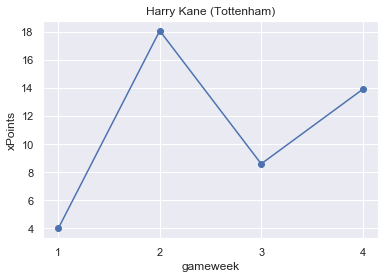

In [12]:
# find player index
name_string = 'Kane'
playersFound = df[df['web_name'].str.contains(name_string)]
display(playersFound)
# plot xPoints over time
ix = playersFound.index[0]
#ix = 46
plt.plot(game_weeks, df.loc[ix,column_xPoints], marker='o')
title_string = df.loc[ix,'first_name'] + ' ' + df.loc[ix,'second_name'] + ' (' + df.loc[ix,'team_name'] + ')'
plt.title(title_string)
plt.xlabel('gameweek')
plt.ylabel('xPoints')
plt.xticks(game_weeks)
plt.show()

## My team

In [15]:
# find player index
df[df['web_name'].str.contains('Pulisi')]

,assists,bonus,bps,chance_of_playing_next_round,chance_of_playing_this_round,clean_sheets,code,corners_and_indirect_freekicks_order,corners_and_indirect_freekicks_text,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,creativity,creativity_rank,creativity_rank_type,direct_freekicks_order,direct_freekicks_text,dreamteam_count,element_type,ep_next,ep_this,event_points,first_name,form,goals_conceded,goals_scored,ict_index,ict_index_rank,ict_index_rank_type,in_dreamteam,influence,influence_rank,influence_rank_type,minutes,news,news_added,now_cost,own_goals,penalties_missed,penalties_order,penalties_saved,penalties_text,photo,points_per_game,red_cards,saves,second_name,selected_by_percent,special,...,transfers_in,transfers_in_event,transfers_out,transfers_out_event,value_form,value_season,web_name,yellow_cards,team_name,games played,adjusted points,xG,xG_points,xG_week4,goals_week4,xPoints week 4,clean_sheet_points,xGA_week4,cleansheet_week4,xA,xA_points,xA_week4,assists_week4,adjusted points per game,xPoints week 1,xG_week1,goals_week1,xGA_week1,cleansheet_week1,xA_week1,assists_week1,xPoints week 2,xG_week2,goals_week2,xGA_week2,cleansheet_week2,xA_week2,assists_week2,xPoints week 3,xG_week3,goals_week3,xGA_week3,cleansheet_week3,xA_week3,assists_week3,next1_xP,next5_xP,next10_xP,value,valuePoints metric
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
119,0,0,7,100.0,100.0,0,176413,6.0,NaN,0,0,-2,2,0.3,330,161,NaN,NaN,0,3,0.7,0.7,1,Christian,0.2,0,0,0.6,335,149,False,5.4,313,140,7,NaN,2020-09-14T22:30:19.934227Z,83,0,0,NaN,0,NaN,176413.jpg,1.0,0,0,Pulisic,3.0,False,...,89908,38797,595574,18363,0.0,0.1,Pulisic,0,Chelsea,1.0,1.279431,0.0,0.0,0.0,0.0,1.0,0.279431,0.1,0.0,0.0,0.0,0.0,0.0,1.279431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.391173,1.36298,1.271656,0.154148,0.444097


In [16]:
my_starting11 = [363,259,200,239,254,272,119,508,469,506,388]
my_subs = [35,77,146,262]

In [17]:
print('STARTING 11')
display(df.loc[my_starting11, ['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game','next1_xP',\
                                                  'valuePoints metric']].head(numberToShow))
print('\nSUBSTITUTES')
display(df.loc[my_subs, ['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game','next1_xP',\
                                                  'valuePoints metric']].head(numberToShow))

STARTING 11


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,next1_xP,valuePoints metric
id,,,,,,,,,,
363,McCarthy,Southampton,45,4.047619,17,15.261521,4.2,3.770494,3.284163,1.777428
259,Alexander-Arnold,Liverpool,75,4.000000,14,14.997757,3.5,3.749439,2.774039,1.369102
200,Dallas,Leeds United,45,3.928571,11,12.223804,2.8,3.111514,3.572215,1.466782
239,Justin,Leicester City,47,4.000000,18,13.500950,4.5,3.375237,2.739426,1.556881
254,Salah,Liverpool,122,4.019608,41,33.193732,10.2,8.257953,5.795665,2.364245
272,De Bruyne,Manchester City,116,2.982456,17,20.947810,5.7,7.023677,7.332995,2.062223
119,Pulisic,Chelsea,83,1.000000,1,1.279431,1.0,1.279431,1.391173,0.444097
508,Rodríguez,Everton,78,3.977273,35,29.427944,8.8,7.399026,8.224299,2.649276
469,Podence,Wolves,56,2.978723,14,12.576676,4.7,4.222170,4.609658,1.784192



SUBSTITUTES


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,next1_xP,valuePoints metric
id,,,,,,,,,,
35,Nyland,Aston Villa,40,NaN,0,NaN,0.0,NaN,NaN,NaN
77,Lamptey,Brighton,47,3.928571,11,13.404161,2.8,3.411968,4.301434,1.573824
146,Mitchell,Crystal Palace,41,4.000000,12,9.551413,3.0,2.387853,2.210666,1.179277
262,Brewster,Sheffield Utd,45,NaN,0,NaN,0.0,NaN,NaN,NaN


## Save data

In [18]:
# save data
filepath = '../data/fpl/data_week' + str(gameweek) + str('.csv')
df.to_csv(filepath)